Neural Network trained on 3 second MFCC only feature set

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline

import csv

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import preprocessing

In [ ]:
song_dir =os.listdir('/content/drive/My Drive/RP/genres')

In [ ]:
dataset_path ='/content/drive/My Drive/Colab Notebooks/RP/feature extraction/25.3/mfcc_10seg.csv'

master_data = pd.read_csv(dataset_path) 
master_data.head()



,mfcc_0_max,mfcc_0_min,mfcc_0_mean,mfcc_0_std,mfcc_0_kurtosis,mfcc_0_skew,mfcc_1_max,mfcc_1_min,mfcc_1_mean,mfcc_1_std,mfcc_1_kurtosis,mfcc_1_skew,mfcc_2_max,mfcc_2_min,mfcc_2_mean,mfcc_2_std,mfcc_2_kurtosis,mfcc_2_skew,mfcc_3_max,mfcc_3_min,mfcc_3_mean,mfcc_3_std,mfcc_3_kurtosis,mfcc_3_skew,mfcc_4_max,mfcc_4_min,mfcc_4_mean,mfcc_4_std,mfcc_4_kurtosis,mfcc_4_skew,mfcc_5_max,mfcc_5_min,mfcc_5_mean,mfcc_5_std,mfcc_5_kurtosis,mfcc_5_skew,mfcc_6_max,mfcc_6_min,mfcc_6_mean,mfcc_6_std,mfcc_6_kurtosis,mfcc_6_skew,mfcc_7_max,mfcc_7_min,mfcc_7_mean,mfcc_7_std,mfcc_7_kurtosis,mfcc_7_skew,mfcc_8_max,mfcc_8_min,mfcc_8_mean,mfcc_8_std,mfcc_8_kurtosis,mfcc_8_skew,mfcc_9_max,mfcc_9_min,mfcc_9_mean,mfcc_9_std,mfcc_9_kurtosis,mfcc_9_skew,mfcc_10_max,mfcc_10_min,mfcc_10_mean,mfcc_10_std,mfcc_10_kurtosis,mfcc_10_skew,mfcc_11_max,mfcc_11_min,mfcc_11_mean,mfcc_11_std,mfcc_11_kurtosis,mfcc_11_skew,mfcc_12_max,mfcc_12_min,mfcc_12_mean,mfcc_12_std,mfcc_12_kurtosis,mfcc_12_skew,genre
0,-66.095581,-322.375763,-180.489746,56.029339,-0.503786,-0.073292,185.002640,75.919044,148.817551,21.791231,1.498838,-0.978635,-2.972806,-70.252602,-41.857468,14.992419,-0.269647,0.609066,48.376587,6.946584,27.720776,9.822040,-0.656997,-0.024329,-12.313562,-52.077335,-33.036140,9.167966,-0.859255,0.024479,37.507103,-3.028800,14.519669,7.686734,0.244976,0.233562,-4.786399,-45.619324,-28.449411,7.343158,0.279836,-0.245533,16.085649,-21.092693,-0.045477,7.397243,-0.263076,-0.234852,4.270063,-32.617149,-14.467911,7.470672,-0.471515,0.129063,35.907036,-11.864138,3.204973,8.351996,2.065390,1.171183,19.338139,-32.714924,-19.285934,8.435503,7.219370,2.304930,28.912182,-12.308210,2.815688,8.808426,-0.260793,0.575162,12.387853,-28.359610,-10.360458,10.190949,-0.724336,0.354533,blues
1,-4.457848,-313.939514,-144.859711,79.197311,-0.641512,-0.343602,176.039719,-9.757294,97.630188,42.406773,-0.591425,0.033210,8.838449,-81.246078,-29.353519,18.753571,-0.203081,-0.171320,86.678543,-4.020520,27.984856,19.108061,0.207342,0.697134,0.663992,-67.913261,-38.930656,19.347927,-0.905685,0.441378,41.800446,-14.666571,18.470774,14.120046,-0.921016,-0.322757,0.716827,-60.540482,-23.751007,13.217931,-0.062808,-0.812195,25.972908,-23.918947,7.619701,10.936043,-0.794935,-0.228306,21.045074,-43.906155,-18.526569,15.031444,0.118298,0.817024,30.541256,-19.761089,6.837147,11.492729,-0.580217,-0.381661,0.232397,-36.592163,-17.526182,8.070435,-0.502971,-0.172180,24.164585,-25.312050,-5.920010,8.267508,0.725408,0.270310,19.701294,-21.291504,-3.452553,10.564160,-0.824106,0.241367,blues
2,-41.664036,-350.602875,-155.986664,80.120628,-0.675011,-0.632811,177.563202,57.217682,114.614326,30.073071,-1.006846,-0.068379,19.228203,-62.240944,-31.848001,17.905291,-0.350581,0.600140,62.289505,-11.759718,26.157040,12.573931,0.473334,-0.210513,-0.092132,-77.862648,-41.750713,19.958370,-1.192774,0.278040,49.037830,-4.931620,15.999944,11.752597,-0.582230,0.136995,-4.980200,-67.112244,-25.147671,10.595219,2.919453,-1.232423,31.932795,-9.238713,11.541316,10.228969,-1.151476,-0.025550,10.531494,-43.282532,-19.102686,13.371345,-0.935848,0.282861,22.897808,-7.069963,6.450355,8.402604,-1.137286,0.101380,-2.642355,-35.036060,-18.482765,7.005689,-0.535371,-0.211209,18.304348,-17.814163,-1.694398,6.966512,-0.179246,0.425300,16.281624,-26.752865,-6.195611,8.952842,-0.399917,0.148912,blues
3,-14.796155,-271.610779,-142.124191,60.267918,-0.733969,-0.043326,179.141785,74.369789,124.720741,28.623041,-1.144072,0.205806,-12.302575,-79.502762,-46.535194,14.553667,-0.518055,0.390256,57.819054,-9.446291,27.608042,15.991866,-0.820154,0.028473,-12.593777,-80.438950,-43.358120,16.176853,-0.589087,-0.568656,37.107292,-14.889535,14.615087,11.856712,-0.517006,-0.316805,-7.524825,-46.599663,-25.516096,8.654659,-0.426574,-0.394456,35.603943,-14.904450,5.250053,11.874260,-0.306107,0.715131,17.805513,-44.041229,-13.371712,13.097857,0.051051,-0.004489,30.755447,-8.647285,8.999457,10.627526,-1.143588,0.059382,14.695620,-39.088749,-16.158848,11.131076,0.

In [ ]:
master_data.shape

(10000, 79)

In [ ]:

y = master_data['genre']
X = master_data.drop(columns=['genre'])

In [ ]:
#scaling data

#scale = StandardScaler()
#x_scaled = pd.DataFrame(scale.fit_transform(X), columns = X.columns)

#transform all the values in range between (0 to 1) .... x = [(value - min)/(Max- Min)]

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = pd.DataFrame(min_max_scaler.fit_transform(X))

In [ ]:
#x_scaled.head()

In [ ]:

#encode the genres:
encoder = LabelEncoder()
y_enc = encoder.fit_transform(y)

In [ ]:
#y_enc
#genre_list.head()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_enc, test_size=0.2)

In [ ]:
len(y_train)

8000

In [ ]:
len(y_test)

2000

Implementing Neural Network


In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(x_train.shape[1],)))

model.add(layers.Dense(256, activation='relu'))

model.add(layers.Dense(128, activation='relu'))
layers.Dropout(0.2),
model.add(layers.Dense(64, activation='relu'))
layers.Dropout(0.2),
model.add(layers.Dense(32, activation='relu'))
layers.Dropout(0.2),
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               40448     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 215,338
Trainable params: 215,338
Non-trainable params: 0
__________________________________________________

In [ ]:
from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=3)

history = model.fit(x_train,y_train,validation_data=(x_test, y_test),epochs=150,batch_size=128)

Epoch 1/150
63/63 [==============================] - 2s 17ms/step - loss: 2.0928 - accuracy: 0.2328 - val_loss: 1.7357 - val_accuracy: 0.3760
Epoch 2/150
63/63 [==============================] - 0s 8ms/step - loss: 1.5937 - accuracy: 0.3982 - val_loss: 1.4260 - val_accuracy: 0.4685
Epoch 3/150
63/63 [==============================] - 0s 7ms/step - loss: 1.3913 - accuracy: 0.4716 - val_loss: 1.3304 - val_accuracy: 0.4980
Epoch 4/150
63/63 [==============================] - 0s 8ms/step - loss: 1.3145 - accuracy: 0.5158 - val_loss: 1.3067 - val_accuracy: 0.5075
Epoch 5/150
63/63 [==============================] - 0s 8ms/step - loss: 1.2613 - accuracy: 0.5316 - val_loss: 1.3053 - val_accuracy: 0.5140
Epoch 6/150
63/63 [==============================] - 0s 7ms/step - loss: 1.2008 - accuracy: 0.5583 - val_loss: 1.3090 - val_accuracy: 0.5330
Epoch 7/150
63/63 [==============================] - 0s 8ms/step - loss: 1.1921 - accuracy: 0.5692 - val_loss: 1.1801 - val_accuracy: 0.5635
Epoch 8/150


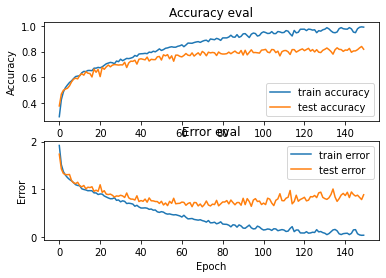

In [ ]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

plot_history(history)

In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

predictions = model.predict(
      x=x_test
    , batch_size=10
    , verbose=0)  

#for i in predictions:
    #print(i)

rounded_predictions = np.argmax(predictions, axis=-1)
#for i in rounded_predictions:
    #print(i)

In [ ]:
#check predictions

print(y_test[250])
print(rounded_predictions[250])

0
0


In [ ]:
cm = confusion_matrix(y_true=y_test, y_pred=rounded_predictions)

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cm_plot_labels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]

Confusion matrix, without normalization
[[171   0  10   1   4   6  10   0   2  10]
 [  0 207   1   0   0  12   0   0   0   1]
 [  6   3 142   6   7   6   5   3   2  13]
 [  6   1   4 144   8   1   5  11   4  22]
 [  1   0   2   4 173   1   5   4   8   2]
 [  5   9   9   1   0 154   2   2   3   7]
 [  0   0   0   2   4   0 173   0   0   8]
 [  0   0   4   5   8   0   0 164   4   1]
 [  1   0   3   9  19   1   2   5 158   5]
 [  7   1   8   6   4   3   8   5   6 150]]


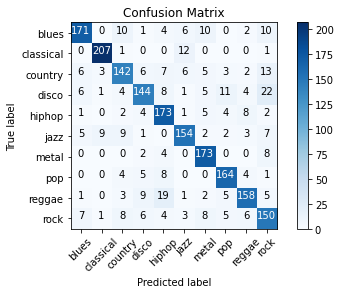

In [ ]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

#total samples - blues - 100 songs - 1 song split into 10 parts - so 1 song = 10 songs - 1000 songs = 10k songs

#total samples = 10k (train = 8000, test = 2000)
#samples of each genree in test set of 2000 songs = 200